# Suitable location for a new Indian/Asian restaurant in Houston or Dallas

## Background
According to reports [https://en.wikipedia.org/wiki/Indian_Americans], Dallas and Houston have the 7th and 8th largest Indian immigrant population in US. The other 6 cities are:
1.	New York, NY
2.	Chicago, IL
3.	Washington, DC
4.	Los Angeles, CA
5.	San Francisco, CA
6.	San Jose, CA

## Problem
Although the Indian immigration population in Dallas and Houston is large, the number of Indian restaurants is few. Hence, there is always demand for new authentic Indian dining restaurants. Due to cultural and culinary proximity, we have used Asian restaurants along with Indian.


## Interest
It is extremely important to choose a suitable location for a new restaurant as this will help the business to thrive. 

**The goal of this project is to determine a location for a new Indian/Asian restaurant within Dallas or Houston area.**

## Get coordinates for Houston and Dallas downtown
package: Nominatim

In [2]:
# Package installation
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [3]:
# Address (approximate)
address_dal = 'Downtown, Dallas, TX'
address_hou = 'Downtown, Houston, TX'

# Nominatim object
geolocator = Nominatim(user_agent="foursquare_agent")

# Load address to the object
location_dal = geolocator.geocode(address_dal)
location_hou = geolocator.geocode(address_hou)

# Get latitude
latitude_dal = location_dal.latitude
longitude_dal = location_dal.longitude

# Get longitude
latitude_hou = location_hou.latitude
longitude_hou = location_hou.longitude

print('Coordinate for Dallas downtown is: ', latitude_dal, longitude_dal)
print('Coordinate for Houston downtown is: ', latitude_hou, longitude_hou)

Coordinate for Dallas downtown is:  32.78015365 -96.79907350429801
Coordinate for Houston downtown is:  29.76428215 -95.3674131325204


## Download zip codes and save relavent information to a dataframe
Website Data downloaded from: https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/

Packages: numpy, pandas

Some preprocessing of data is needed as the csv file has only 1 column with all the values seperated by ';'
1. The dataframe is converted to a list
2. The column labels are also converted to list and split to make column lebels for new dataframe
3. Every element(row) is split and seperated into columns. Values are written into a new dataframe.

In [4]:
# Package installation
import pandas as pd
import numpy as np

### Zip codes for Houston

In [5]:
# Read file
data = pd.read_csv('ZipCodeHoustonTX.csv')

# Convert dataframe to list
x_list = data.index.tolist()

# Split the single column label into appropriate number of columns and create a dataframe
#df = pd.DataFrame(columns=data.columns.str.split(';').tolist())

# This gives multilevel indexing, hence defining the columns manually for ease
df = pd.DataFrame(columns=['Zip','City','State','Latitude','Longitude','Timezone','Daylight savings time flag','geopoint'])

# Split each element of the list and write to seperate columns of the new dataframe
for i in range(len(x_list)):
    result = [x.strip() for x in x_list[i].split(';')]
    df.loc[i] = result

# Drop redundant columns to create the final dataframe
zip_houston = df.drop(df.columns[[2,5,6,7]], axis=1)

# Convert Latitude and Longitude columns to float from string
zip_houston['Latitude'] = pd.to_numeric(zip_houston['Latitude'])
zip_houston['Longitude'] = pd.to_numeric(zip_houston['Longitude'])

zip_houston.head()

,Zip,City,Latitude,Longitude
0,77028,Houston,29.827315,-95.286310
1,77036,Houston,29.700530,-95.535140
2,77225,Houston,29.833990,-95.434241
3,77058,Houston,29.552830,-95.102650
4,77095,Houston,29.896656,-95.648420


### Zip codes for Dallas

In [6]:
# Read file
data = pd.read_csv('ZipCodeDallasTX.csv')

# Convert dataframe to list
x_list = data.index.tolist()

# Split the single column label into appropriate number of columns and create a dataframe
#df = pd.DataFrame(columns=data.columns.str.split(';').tolist())

# This gives multilevel indexing, hence defining the columns manually for ease
df = pd.DataFrame(columns=['Zip','City','State','Latitude','Longitude','Timezone','Daylight savings time flag','geopoint'])

# Split each element of the list and write to seperate columns of the new dataframe
for i in range(len(x_list)):
    result = [x.strip() for x in x_list[i].split(';')]
    df.loc[i] = result

# Drop redundant columns to create the final dataframe
zip_dallas = df.drop(df.columns[[2,5,6,7]], axis=1)

# Convert Latitude and Longitude columns to float from string
zip_dallas['Latitude'] = pd.to_numeric(zip_dallas['Latitude'])
zip_dallas['Longitude'] = pd.to_numeric(zip_dallas['Longitude'])

zip_dallas.head()

,Zip,City,Latitude,Longitude
0,75323,Dallas,32.767268,-96.777626
1,75232,Dallas,32.664034,-96.838860
2,75376,Dallas,32.767268,-96.777626
3,75283,Dallas,32.767268,-96.777626
4,75240,Dallas,32.938774,-96.785430


Check how many zip codes we have for each city

In [7]:
print('Number of Zip code areas for Houston are ', zip_houston.shape[0])
print('Number of Zip code areas for Dallas are ', zip_dallas.shape[0])

Number of Zip code areas for Houston are  184
Number of Zip code areas for Dallas are  123


## Plot the areas on map

Package: Folium

In [8]:
# Package installation

#!pip install folium
import folium

### Houston map

In [13]:
# create map of Houston using latitude and longitude values
map_houston = folium.Map(location=[latitude_hou, longitude_hou], zoom_start=10)

# add markers to map
for lat, lng, loc in zip(zip_houston['Latitude'], zip_houston['Longitude'], zip_houston['Zip']):
    label = '{}'.format(loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)  
    
map_houston.save('HoustonAllZip.html')
map_houston

### Dallas map

In [15]:
# create map of Dallas using latitude and longitude values
map_dallas = folium.Map(location=[latitude_dal, longitude_dal], zoom_start=10)

# add markers to map
for lat, lng, loc in zip(zip_dallas['Latitude'], zip_dallas['Longitude'], zip_dallas['Zip']):
    label = '{}'.format(loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dallas)  
    
map_dallas.save('DallasAllZip.html')
map_dallas

## Importing restaurants nearby obtained locations 

Now that we have our preferred locations, we need to import the nearby restaurants from www.foursquare.com 

Here we are focusing on Indian restaurant category.

### Foursquare credentials

In [52]:
CLIENT_ID = ''
CLIENT_SECRET = ''
ACCESS_TOKEN = ''
VERSION = '20201220'
LIMIT = 50

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)
print('Access Token: ' + ACCESS_TOKEN)

My credentails:
CLIENT_ID: 
CLIENT_SECRET: 
Access Token: 


We are focusing on the "Indian Restaurant" category. In this category, there are many subcategories which shall be included in our list. But unfortunately, many of them has the field named "Supported countries: IN". This means, these type of restaurants are only present in India. As our analysis is based on US cities, we have excluded those categoreis. 

Website link: https://developer.foursquare.com/docs/build-with-foursquare/categories/

The list of the applicable categories are as follows:

In [17]:
FoodCategory = '4d4b7105d754a06374d81259'

IndianRestaurantCategories = ['4bf58dd8d48988d10f941735','54135bf5e4b08f3d2429dfe2',
                              '54135bf5e4b08f3d2429dfe3','54135bf5e4b08f3d2429dfdf',
                              '54135bf5e4b08f3d2429dfdd','54135bf5e4b08f3d2429dfde']

ChineseRestaurantCategories = ['4bf58dd8d48988d145941735','52af3a7c3cf9994f4e043bed',
                             '58daa1558bbb0b01f18ec1d3','4bf58dd8d48988d1f5931735',
                             '52af3a9f3cf9994f4e043bef','52af3aaa3cf9994f4e043bf0',
                             '52af3ac83cf9994f4e043bf3','52af3afc3cf9994f4e043bf8',
                             '52af3b463cf9994f4e043bfe','52af3b593cf9994f4e043c00',
                             '52af3b773cf9994f4e043c03','52af3b813cf9994f4e043c04',
                             '52af3b913cf9994f4e043c06',]

JapaneseRestaurantCategories = ['4bf58dd8d48988d111941735','55a59bace4b013909087cb30',
                               '55a59bace4b013909087cb24','55a59bace4b013909087cb15',
                               '55a59bace4b013909087cb27','4bf58dd8d48988d1d2941735',
                               '55a59bace4b013909087cb2a']

OtherAsianRestaurantCategories = ['56aa371be4b08b9a8d573568','52e81612bcbc57f1066b7a03',
                                 '4eb1bd1c3b7b55596b4a748f','52e81612bcbc57f1066b79fb',
                                 '52af0bd33cf9994f4e043bdd','4deefc054765f83613cdba6f',
                                 '4bf58dd8d48988d113941735','4bf58dd8d48988d156941735',
                                 '4eb1d5724b900d56c88a45fe','4bf58dd8d48988d1d1941735',
                                 '56aa371be4b08b9a8d57350e','4bf58dd8d48988d149941735',
                                 '52af39fb3cf9994f4e043be9','4bf58dd8d48988d14a941735',
                                 '4bf58dd8d48988d142941735']

##### Defining a function to get top 50 restaurants with 500 meters radius in every zip code present in our Houston and Dallas datasets

Package: requests, json

In [18]:
import requests
import json 

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            FoodCategory,
            radius, 
            LIMIT)
     
        
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['id']) for v in results])        
        
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ZipCode', 
                  'ZipCode Latitude', 
                  'ZipCode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Category ID']
    
    return(nearby_venues)

### Get all the restaurants for Houston and Dallas

In [19]:
# Houston
houston_restaurants = getNearbyVenues(names=zip_houston['Zip'], latitudes=zip_houston['Latitude'], longitudes=zip_houston['Longitude'])

# Dallas
dallas_restaurants = getNearbyVenues(names=zip_dallas['Zip'], latitudes=zip_dallas['Latitude'], longitudes=zip_dallas['Longitude'])

77028
77036
77225
77058
77095
77219
77005
77088
77066
77203
77059
77212
77045
77020
77270
77007
77014
77046
77015
77289
77072
77216
77218
77027
77060
77034
77003
77217
77263
77042
77091
77213
77224
77257
77221
77022
77031
77094
77055
77222
77098
77235
77281
77065
77226
77267
77021
77090
77262
77206
77089
77063
77230
77061
77256
77069
77051
77261
77076
77233
77288
77025
77290
77240
77032
77271
77092
77062
77244
77041
77038
77050
77002
77085
77215
77280
77064
77044
77053
77259
77220
77054
77037
77093
77068
77293
77004
77074
77030
77071
77006
77587
77266
77268
77010
77201
77099
77258
77012
77254
77287
77017
77202
77249
77298
77292
77043
77039
77052
77067
77080
77081
77011
77273
77242
77073
77009
77075
77236
77279
77077
77079
77231
77018
77237
77204
77223
77096
77024
77019
77265
77048
77208
77013
77241
77315
77057
77047
77000
77229
77016
77082
77078
77209
77252
77243
77274
77210
77282
77008
77238
77086
77248
77026
77083
77097
77033
77297
77291
77275
77253
77228
77255
77001
77205
77227
7704

### Check how many restaurants we have got in total for each city

In [20]:
# Houston
print('What is the shape of total Houston restaurants? ', houston_restaurants.shape)
houston_restaurants.head()

What is the shape of total Houston restaurants?  (572, 8)


,ZipCode,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category ID
0,77028,29.827315,-95.28631,D & J Burger & Bar,29.831741,-95.286358,Burger Joint,4bf58dd8d48988d16c941735
1,77028,29.827315,-95.28631,Hartz Chicken,29.831176,-95.283738,Fried Chicken Joint,4d4ae6fc7a7b7dea34424761
2,77036,29.700530,-95.53514,Tacos pacos,29.703409,-95.537929,Food Truck,4bf58dd8d48988d1cb941735
3,77058,29.552830,-95.10265,The Grill Shack,29.551767,-95.098468,Burger Joint,4bf58dd8d48988d16c941735
4,77058,29.552830,-95.10265,Zero-G Diner,29.551842,-95.097965,Cafeteria,4bf58dd8d48988d128941735


In [21]:
# Dallas
print('What is the shape of total Dallas restaurants? ', dallas_restaurants.shape)
dallas_restaurants.head()

What is the shape of total Dallas restaurants?  (457, 8)


,ZipCode,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category ID
0,75323,32.767268,-96.777626,Dfw Produce,32.769696,-96.779091,Food,4d4b7105d754a06374d81259
1,75232,32.664034,-96.838860,Subway,32.662949,-96.840589,Sandwich Place,4bf58dd8d48988d1c5941735
2,75232,32.664034,-96.838860,Church's Chicken,32.662536,-96.838936,Fried Chicken Joint,4d4ae6fc7a7b7dea34424761
3,75232,32.664034,-96.838860,Domino's Pizza,32.662976,-96.840916,Pizza Place,4bf58dd8d48988d1ca941735
4,75232,32.664034,-96.838860,Little Caesars Pizza,32.661487,-96.841020,Pizza Place,4bf58dd8d48988d1ca941735


### Add a column to restaurant dataframes named "IsIndian?" to indicate if the item is an Indian restaurant or not

Also check the number of Indian restaurants

In [22]:
# Houston
houston_restaurants['IsIndian?'] = houston_restaurants['Venue Category ID'].isin(IndianRestaurantCategories)
houston_restaurants['IsChinese?'] = houston_restaurants['Venue Category ID'].isin(ChineseRestaurantCategories)
houston_restaurants['IsJapanese?'] = houston_restaurants['Venue Category ID'].isin(JapaneseRestaurantCategories)
houston_restaurants['OtherAsian?'] = houston_restaurants['Venue Category ID'].isin(OtherAsianRestaurantCategories)

print('How many Indian restaurants are there in Houston?', houston_restaurants['IsIndian?'].sum())
print('How many Chinese restaurants are there in Houston?', houston_restaurants['IsChinese?'].sum())
print('How many Japanese restaurants are there in Houston?', houston_restaurants['IsJapanese?'].sum())
print('How many Other Asian restaurants are there in Houston?', houston_restaurants['OtherAsian?'].sum())

houston_restaurants.head()
#print(houston_restaurants[houston_restaurants['IsIndian?'] == True])

How many Indian restaurants are there in Houston? 9
How many Chinese restaurants are there in Houston? 17
How many Japanese restaurants are there in Houston? 11
How many Other Asian restaurants are there in Houston? 28


,ZipCode,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?
0,77028,29.827315,-95.28631,D & J Burger & Bar,29.831741,-95.286358,Burger Joint,4bf58dd8d48988d16c941735,False,False,False,False
1,77028,29.827315,-95.28631,Hartz Chicken,29.831176,-95.283738,Fried Chicken Joint,4d4ae6fc7a7b7dea34424761,False,False,False,False
2,77036,29.700530,-95.53514,Tacos pacos,29.703409,-95.537929,Food Truck,4bf58dd8d48988d1cb941735,False,False,False,False
3,77058,29.552830,-95.10265,The Grill Shack,29.551767,-95.098468,Burger Joint,4bf58dd8d48988d16c941735,False,False,False,False
4,77058,29.552830,-95.10265,Zero-G Diner,29.551842,-95.097965,Cafeteria,4bf58dd8d48988d128941735,False,False,False,False


In [23]:
# Dallas
dallas_restaurants['IsIndian?'] = dallas_restaurants['Venue Category ID'].isin(IndianRestaurantCategories)
dallas_restaurants['IsChinese?'] = dallas_restaurants['Venue Category ID'].isin(ChineseRestaurantCategories)
dallas_restaurants['IsJapanese?'] = dallas_restaurants['Venue Category ID'].isin(JapaneseRestaurantCategories)
dallas_restaurants['OtherAsian?'] = dallas_restaurants['Venue Category ID'].isin(OtherAsianRestaurantCategories)

print('How many Indian restaurants are there in Dallas?', dallas_restaurants['IsIndian?'].sum())
print('How many Chinese restaurants are there in Dallas?', dallas_restaurants['IsChinese?'].sum())
print('How many Japanese restaurants are there in Dallas?', dallas_restaurants['IsJapanese?'].sum())
print('How many Other Asian restaurants are there in Dallas?', dallas_restaurants['OtherAsian?'].sum())

dallas_restaurants.head()
#print(dallas_restaurants[dallas_restaurants['IsIndian?'] == True])

How many Indian restaurants are there in Dallas? 1
How many Chinese restaurants are there in Dallas? 7
How many Japanese restaurants are there in Dallas? 13
How many Other Asian restaurants are there in Dallas? 15


,ZipCode,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?
0,75323,32.767268,-96.777626,Dfw Produce,32.769696,-96.779091,Food,4d4b7105d754a06374d81259,False,False,False,False
1,75232,32.664034,-96.838860,Subway,32.662949,-96.840589,Sandwich Place,4bf58dd8d48988d1c5941735,False,False,False,False
2,75232,32.664034,-96.838860,Church's Chicken,32.662536,-96.838936,Fried Chicken Joint,4d4ae6fc7a7b7dea34424761,False,False,False,False
3,75232,32.664034,-96.838860,Domino's Pizza,32.662976,-96.840916,Pizza Place,4bf58dd8d48988d1ca941735,False,False,False,False
4,75232,32.664034,-96.838860,Little Caesars Pizza,32.661487,-96.841020,Pizza Place,4bf58dd8d48988d1ca941735,False,False,False,False


## Plot the results to compare restaurants in Houston and Dallas

Package: matplotlib

In [24]:
# Package installation
import matplotlib.pyplot as plt

### Plot total of all Asian + Indian restaurants along with all other restaurants found in the areas

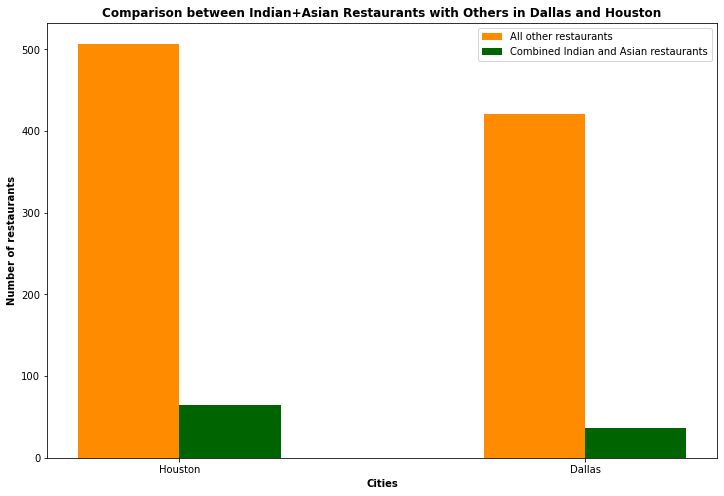

In [28]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
general = [houston_restaurants.shape[0] - houston_restaurants['IsIndian?'].sum() 
           - houston_restaurants['IsChinese?'].sum() - houston_restaurants['IsJapanese?'].sum() - houston_restaurants['OtherAsian?'].sum(),
           dallas_restaurants.shape[0] - dallas_restaurants['IsIndian?'].sum() 
           - dallas_restaurants['IsChinese?'].sum() - dallas_restaurants['IsJapanese?'].sum() - dallas_restaurants['OtherAsian?'].sum()]
comasian = [houston_restaurants['IsIndian?'].sum() + houston_restaurants['IsChinese?'].sum() 
            + houston_restaurants['IsJapanese?'].sum() + houston_restaurants['OtherAsian?'].sum(),
           dallas_restaurants['IsIndian?'].sum() + dallas_restaurants['IsChinese?'].sum() 
            + dallas_restaurants['IsJapanese?'].sum() + dallas_restaurants['OtherAsian?'].sum()]

# Set position of bar on X axis 
br1 = np.arange(2) 
br2 = [x + barWidth for x in br1] 

# Make the plot 
plt.bar(br1, general, color ='darkorange', width = barWidth, 
        label ='All other restaurants') 
plt.bar(br2, comasian, color ='darkgreen', width = barWidth, 
        label ='Combined Indian and Asian restaurants') 

# Adding Xticks  
plt.title('Comparison between Indian+Asian Restaurants with Others in Dallas and Houston', fontweight = 'bold')
plt.xlabel('Cities', fontweight ='bold') 
plt.ylabel('Number of restaurants', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(general))], 
           ['Houston', 'Dallas']) 
plt.legend(loc="upper right") 
plt.savefig('AllRestaurantComparison.png', dpi=400)
plt.show() 

Provided that these 2 cities have large number of Asian population, it is clear that there are not enough Asian restaurants in those cities.

### Now check the proportions of different type of Asian restaurants

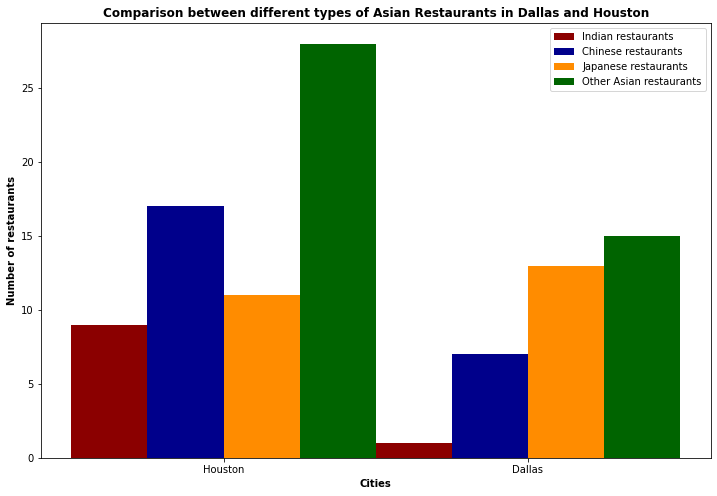

In [29]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
indian = [houston_restaurants['IsIndian?'].sum(),dallas_restaurants['IsIndian?'].sum()]
chinese = [houston_restaurants['IsChinese?'].sum(),dallas_restaurants['IsChinese?'].sum()]
japanese = [houston_restaurants['IsJapanese?'].sum(),dallas_restaurants['IsJapanese?'].sum()]
other = [houston_restaurants['OtherAsian?'].sum(),dallas_restaurants['OtherAsian?'].sum()]

# Set position of bar on X axis 
br1 = np.arange(2) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 

# Make the plot 
plt.bar(br1, indian, color ='darkred', width = barWidth, 
        label ='Indian restaurants') 
plt.bar(br2, chinese, color ='darkblue', width = barWidth, 
        label ='Chinese restaurants') 
plt.bar(br3, japanese, color ='darkorange', width = barWidth, 
        label ='Japanese restaurants') 
plt.bar(br4, other, color ='darkgreen', width = barWidth, 
        label ='Other Asian restaurants') 

# Adding Xticks  
plt.title('Comparison between different types of Asian Restaurants in Dallas and Houston', fontweight = 'bold')
plt.xlabel('Cities', fontweight ='bold') 
plt.ylabel('Number of restaurants', fontweight ='bold') 
plt.xticks([r + barWidth*1.5 for r in range(2)], 
           ['Houston', 'Dallas']) 
plt.legend(loc="upper right") 
plt.savefig('AsianRestaurantComparison.png', dpi=400)
plt.show() 

It is clearly visible from the above graph that Houston has more Asian and Indian restaurants than Dallas. Hence, from now on, we are going to concentrate our analysis on Houston. 

**The goal is to find a suitable location for a new Indian or Asian restaurant in Houston**

## Finding suitable location in Houston for a new Indian restaurant

First, the restaurant locations are marked on Houston map.

In [30]:
# create map of Houston using latitude and longitude values
map_houston = folium.Map(location=[latitude_hou, longitude_hou], zoom_start=10)

# add markers to map
for lat, lng, loc in zip(houston_restaurants['Venue Latitude'], houston_restaurants['Venue Longitude'], zip_houston['Zip']):
    label = '{}'.format(loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)  

map_houston.save('HoustonAllRestaurants.html')
map_houston

As the map shows, most of the restaurant locations are forming some kind of group or cluster. 
**Hence, we will cluster the locations to form a more simplified map. We will use k-mean algorithm to cluster locations.**

## K-mean clustering

Packages: sklearn (KMeans)

For clustering, the latitude and longitude values of retaurant locations will be used. Some preprocessing of data is needed as k-means algorithm does not accept categorical variables. The dataframe also needed to be converted to numpy array.

In [31]:
# Generating data for clustering
clust_data = houston_restaurants[['Venue Latitude', 'Venue Longitude']].values
clust_data

array([[ 29.831741  , -95.286358  ],
       [ 29.83117592, -95.28373753],
       [ 29.70340889, -95.53792887],
       ...,
       [ 29.685064  , -95.301529  ],
       [ 29.68671036, -95.30446625],
       [ 29.685475  , -95.305279  ]])

### Elbow method

This method is used to determine the most suitable value of K for our dataset. As seen from the map, we are seeking a value between 5 and 20.

In [32]:
# Install packages
from sklearn.cluster import KMeans

In [33]:
# Calculating inertia value from the model with different Ks
inertias = [] 

K = range(1,30) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(clust_data)     
      
    inertias.append(kmeanModel.inertia_)

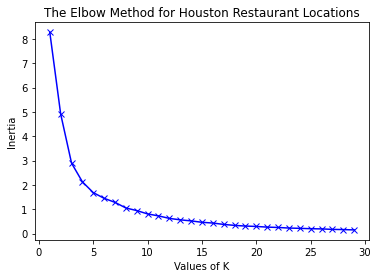

In [34]:
# Plotting the inertia values against K
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method for Houston Restaurant Locations') 
plt.savefig('ElbowHoustonRestaurant.png', dpi=400)
plt.show() 

Based on the map and elbow method, we have decided to use **K=10** for our analysis.

### Clustering with k-mean algorithm

In [35]:
clusterNum = 10
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(clust_data)
labels = k_means.labels_
print(labels)

[9 9 3 4 4 1 5 5 1 1 1 1 3 3 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 8 8 8 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 6 6 6 6 6 6
 6 6 6 6 5 5 5 5 5 5 5 5 5 5 8 8 8 8 8 8 8 0 0 0 0 6 6 6 6 6 6 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 3 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 1 0 0 0 7 7 7 7
 7 5 2 4 2 2 2 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 5 5 5 5 5 5 5 5
 7 7 7 7 7 7 7 8 0 0 0 0 0 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 3 3 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6
 0 0 0 0 4 4 0 0 0 2 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 8 7 7 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 3 3 3 3
 5 5 5 5 5 5 5 5 5 5 5 0 

Now assign cluster labels to each row of dataframe.

In [36]:
houston_restaurants["Clus_km"] = labels
houston_restaurants.head()

,ZipCode,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?,Clus_km
0,77028,29.827315,-95.28631,D & J Burger & Bar,29.831741,-95.286358,Burger Joint,4bf58dd8d48988d16c941735,False,False,False,False,9
1,77028,29.827315,-95.28631,Hartz Chicken,29.831176,-95.283738,Fried Chicken Joint,4d4ae6fc7a7b7dea34424761,False,False,False,False,9
2,77036,29.700530,-95.53514,Tacos pacos,29.703409,-95.537929,Food Truck,4bf58dd8d48988d1cb941735,False,False,False,False,3
3,77058,29.552830,-95.10265,The Grill Shack,29.551767,-95.098468,Burger Joint,4bf58dd8d48988d16c941735,False,False,False,False,4
4,77058,29.552830,-95.10265,Zero-G Diner,29.551842,-95.097965,Cafeteria,4bf58dd8d48988d128941735,False,False,False,False,4


### Get top 5 cluster labels according to number of restaurants

We will explore these 5 clusters further to get our final location for restaurant.

In [37]:
top5 = houston_restaurants.groupby('Clus_km')['Clus_km'].count().nlargest(5)
top5

Clus_km
5    153
0    146
3     62
7     49
6     42
Name: Clus_km, dtype: int64

In [38]:
# Include a new column into dataframe to check if the restaurant is in top 5
top5_index = list(top5.index)
houston_restaurants['Istop5?'] = houston_restaurants['Clus_km'].isin(top5_index)
top5_clusters = houston_restaurants[houston_restaurants['Istop5?'] == True]

#houston_restaurants.head()
top5_clusters.head()

,ZipCode,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?,Clus_km,Istop5?
2,77036,29.700530,-95.53514,Tacos pacos,29.703409,-95.537929,Food Truck,4bf58dd8d48988d1cb941735,False,False,False,False,3,True
6,77005,29.717529,-95.42821,Taste Citrus,29.714467,-95.425726,Eastern European Restaurant,4bf58dd8d48988d109941735,False,False,False,False,5,True
7,77005,29.717529,-95.42821,Croissant Briocche,29.714392,-95.425815,Bakery,4bf58dd8d48988d16a941735,False,False,False,False,5,True
12,77045,29.629111,-95.43841,Pupuseria Y Taqueria,29.627482,-95.435694,Food,4d4b7105d754a06374d81259,False,False,False,False,3,True
13,77045,29.629111,-95.43841,Cristal Taqueria y Pupuseria,29.627307,-95.442957,Latin American Restaurant,4bf58dd8d48988d1be941735,False,False,False,False,3,True


### Mark top 5 clusters on map

In [39]:
# Get the center of top 5 clusters
x = houston_restaurants.groupby('Clus_km', as_index=False)['Venue Latitude','Venue Longitude'] .mean()
top5_center = x[x['Clus_km'].isin(top5_index) == True]
top5_center

<ipython-input-39-c2e3aa2cb645>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = houston_restaurants.groupby('Clus_km', as_index=False)['Venue Latitude','Venue Longitude'] .mean()


,Clus_km,Venue Latitude,Venue Longitude
0,0,29.747098,-95.351553
3,3,29.708263,-95.494066
5,5,29.739079,-95.409665
6,6,29.731683,-95.599092
7,7,29.828665,-95.388398


In [40]:
# Import packages
import matplotlib.cm as cm
import matplotlib.colors as colors

In [42]:
# Map clusters
map_clusters = folium.Map(location=[latitude_hou, longitude_hou], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(top5_center['Venue Latitude'], top5_center['Venue Longitude'], top5_center['Clus_km']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[4],
        fill=True,
        fill_color=rainbow[4],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters.save('HoustonClusters.html')       
map_clusters

## Examine top 5 clusters

As we have got our dataset with top 5 cluster labels, we will now check each cluster for Indian and Asian restaurants. The cluster with small number of Indian and Asian restaurants will be ideal to set up a new Indian/Asian restaurant.

### Cluster 1 (Clus_km = 5)

In [43]:
# Examine cluster
x = top5_clusters.loc[top5_clusters['Clus_km'] == 5, top5_clusters.columns[[1] + list(range(5, top5_clusters.shape[1]))]]
x

,ZipCode Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?,Clus_km,Istop5?
6,29.717529,-95.425726,Eastern European Restaurant,4bf58dd8d48988d109941735,False,False,False,False,5,True
7,29.717529,-95.425815,Bakery,4bf58dd8d48988d16a941735,False,False,False,False,5,True
21,29.772627,-95.405620,Steakhouse,4bf58dd8d48988d1cc941735,False,False,False,False,5,True
22,29.772627,-95.401183,Mediterranean Restaurant,4bf58dd8d48988d1c0941735,False,False,False,False,5,True
23,29.772627,-95.398972,Sandwich Place,4bf58dd8d48988d1c5941735,False,False,False,False,5,True
...,...,...,...,...,...,...,...,...,...,...
487,29.752528,-95.401424,Bakery,4bf58dd8d48988d16a941735,False,False,False,False,5,True
488,29.752528,-95.401854,Asian Restaurant,4bf58dd8d48988d142941735,False,False,False,True,5,True
489,29.752528,-95.398023,Taco Place,4bf58dd8d48988d151941735,False,False,False,False,5,True
490,29.752528,-95.403258,Vietnamese Restaurant,4bf58dd8d48988d14a941735,False,False,False,True,5,True


In [44]:
# Examine number of Indian + Asian restaurants in this cluster
print('How many Indian restaurants in cluster 1?', x['IsIndian?'].sum())
print('How many Chinese restaurants in cluster 1?', x['IsChinese?'].sum())
print('How many Japanese restaurants in cluster 1?', x['IsJapanese?'].sum())
print('How many Other Asian restaurants in cluster 1?', x['OtherAsian?'].sum())

How many Indian restaurants in cluster 1? 6
How many Chinese restaurants in cluster 1? 4
How many Japanese restaurants in cluster 1? 7
How many Other Asian restaurants in cluster 1? 8


### Cluster 2 (Clus_km = 0)

In [45]:
# Examine cluster
x = top5_clusters.loc[top5_clusters['Clus_km'] == 0, top5_clusters.columns[[1] + list(range(5, top5_clusters.shape[1]))]]
x

,ZipCode Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?,Clus_km,Istop5?
14,29.775927,-95.316046,Sandwich Place,4bf58dd8d48988d1c5941735,False,False,False,False,0,True
15,29.775927,-95.314876,Fast Food Restaurant,4bf58dd8d48988d16e941735,False,False,False,False,0,True
16,29.775927,-95.314613,Pizza Place,4bf58dd8d48988d1ca941735,False,False,False,False,0,True
17,29.775927,-95.315925,Sandwich Place,4bf58dd8d48988d1c5941735,False,False,False,False,0,True
18,29.775927,-95.322685,Snack Place,4bf58dd8d48988d1c7941735,False,False,False,False,0,True
...,...,...,...,...,...,...,...,...,...,...
567,29.725961,-95.322793,Mexican Restaurant,4bf58dd8d48988d1c1941735,False,False,False,False,0,True
568,29.725961,-95.320775,Greek Restaurant,4bf58dd8d48988d10e941735,False,False,False,False,0,True
569,29.686579,-95.301529,Snack Place,4bf58dd8d48988d1c7941735,False,False,False,False,0,True
570,29.686579,-95.304466,BBQ Joint,4bf58dd8d48988d1df931735,False,False,False,False,0,True


In [46]:
# Examine number of Indian + Asian restaurants in this cluster
print('How many Indian restaurants in cluster 2?', x['IsIndian?'].sum())
print('How many Chinese restaurants in cluster 2?', x['IsChinese?'].sum())
print('How many Japanese restaurants in cluster 2?', x['IsJapanese?'].sum())
print('How many Other Asian restaurants in cluster 2?', x['OtherAsian?'].sum())

How many Indian restaurants in cluster 2? 1
How many Chinese restaurants in cluster 2? 3
How many Japanese restaurants in cluster 2? 1
How many Other Asian restaurants in cluster 2? 3


### Cluster 3 (Clus_km = 3)

In [47]:
# Examine cluster
x = top5_clusters.loc[top5_clusters['Clus_km'] == 3, top5_clusters.columns[[1] + list(range(5, top5_clusters.shape[1]))]]
x

,ZipCode Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?,Clus_km,Istop5?
2,29.700530,-95.537929,Food Truck,4bf58dd8d48988d1cb941735,False,False,False,False,3,True
12,29.629111,-95.435694,Food,4d4b7105d754a06374d81259,False,False,False,False,3,True
13,29.629111,-95.442957,Latin American Restaurant,4bf58dd8d48988d1be941735,False,False,False,False,3,True
123,29.654132,-95.542772,Food,4d4b7105d754a06374d81259,False,False,False,False,3,True
194,29.734379,-95.520855,Turkish Restaurant,4f04af1f2fb6e1c99f3db0bb,False,False,False,False,3,True
...,...,...,...,...,...,...,...,...,...,...
559,29.654108,-95.478071,Pizza Place,4bf58dd8d48988d1ca941735,False,False,False,False,3,True
560,29.654108,-95.476608,Gastropub,4bf58dd8d48988d155941735,False,False,False,False,3,True
561,29.654108,-95.475761,Mexican Restaurant,4bf58dd8d48988d1c1941735,False,False,False,False,3,True
562,29.654108,-95.479370,Food,4d4b7105d754a06374d81259,False,False,False,False,3,True


In [48]:
# Examine number of Indian + Asian restaurants in this cluster
print('How many Indian restaurants in cluster 3?', x['IsIndian?'].sum())
print('How many Chinese restaurants in cluster 3?', x['IsChinese?'].sum())
print('How many Japanese restaurants in cluster 3?', x['IsJapanese?'].sum())
print('How many Other Asian restaurants in cluster 3?', x['OtherAsian?'].sum())

How many Indian restaurants in cluster 3? 0
How many Chinese restaurants in cluster 3? 3
How many Japanese restaurants in cluster 3? 2
How many Other Asian restaurants in cluster 3? 2


### Cluster 4 (Clus_km = 7)

In [49]:
# Examine cluster
x = top5_clusters.loc[top5_clusters['Clus_km'] == 7, top5_clusters.columns[[1] + list(range(5, top5_clusters.shape[1]))]]
x

,ZipCode Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?,Clus_km,Istop5?
105,29.825176,-95.378846,French Restaurant,4bf58dd8d48988d10c941735,False,False,False,False,7,True
106,29.825176,-95.379652,Hot Dog Joint,4bf58dd8d48988d16f941735,False,False,False,False,7,True
107,29.825176,-95.380430,Fast Food Restaurant,4bf58dd8d48988d16e941735,False,False,False,False,7,True
108,29.825176,-95.379192,Breakfast Spot,4bf58dd8d48988d143941735,False,False,False,False,7,True
109,29.825176,-95.378605,BBQ Joint,4bf58dd8d48988d1df931735,False,False,False,False,7,True
110,29.825176,-95.378332,Sandwich Place,4bf58dd8d48988d1c5941735,False,False,False,False,7,True
111,29.825176,-95.376687,Fried Chicken Joint,4d4ae6fc7a7b7dea34424761,False,False,False,False,7,True
112,29.825176,-95.378862,Chinese Restaurant,4bf58dd8d48988d145941735,False,True,False,False,7,True
113,29.825176,-95.379317,Breakfast Spot,4bf58dd8d48988d143941735,False,False,False,False,7,True
114,29.825176,-95.375655,Fast Food Restaurant,4bf58dd8d48988d16e941735,False,False,False,False,7,True


In [289]:
# Examine number of Indian + Asian restaurants in this cluster
print('How many Indian restaurants in cluster 4?', x['IsIndian?'].sum())
print('How many Chinese restaurants in cluster 4?', x['IsChinese?'].sum())
print('How many Japanese restaurants in cluster 4?', x['IsJapanese?'].sum())
print('How many Other Asian restaurants in cluster 4?', x['OtherAsian?'].sum())

How many Indian restaurants in cluster 4? 0
How many Chinese restaurants in cluster 4? 1
How many Japanese restaurants in cluster 4? 0
How many Other Asian restaurants in cluster 4? 0


### Cluster 5 (Clus_km = 6)

In [50]:
# Examine cluster
x = top5_clusters.loc[top5_clusters['Clus_km'] == 6, top5_clusters.columns[[1] + list(range(5, top5_clusters.shape[1]))]]
x

,ZipCode Latitude,Venue Longitude,Venue Category,Venue Category ID,IsIndian?,IsChinese?,IsJapanese?,OtherAsian?,Clus_km,Istop5?
68,29.700898,-95.587450,Noodle House,4bf58dd8d48988d1d1941735,False,False,False,True,6,True
69,29.700898,-95.593516,Noodle House,4bf58dd8d48988d1d1941735,False,False,False,True,6,True
70,29.700898,-95.589556,Sandwich Place,4bf58dd8d48988d1c5941735,False,False,False,False,6,True
71,29.700898,-95.590163,Pizza Place,4bf58dd8d48988d1ca941735,False,False,False,False,6,True
72,29.700898,-95.587973,Vietnamese Restaurant,4bf58dd8d48988d14a941735,False,False,False,True,6,True
73,29.700898,-95.587624,Fried Chicken Joint,4d4ae6fc7a7b7dea34424761,False,False,False,False,6,True
74,29.700898,-95.588097,Cajun / Creole Restaurant,4bf58dd8d48988d17a941735,False,False,False,False,6,True
75,29.700898,-95.587418,Asian Restaurant,4bf58dd8d48988d142941735,False,False,False,True,6,True
76,29.700898,-95.589073,Fast Food Restaurant,4bf58dd8d48988d16e941735,False,False,False,False,6,True
77,29.700898,-95.587035,Fast Food Restaurant,4bf58dd8d48988d16e941735,False,False,False,False,6,True


In [51]:
# Examine number of Indian + Asian restaurants in this cluster
print('How many Indian restaurants in cluster 5?', x['IsIndian?'].sum())
print('How many Chinese restaurants in cluster 5?', x['IsChinese?'].sum())
print('How many Japanese restaurants in cluster 5?', x['IsJapanese?'].sum())
print('How many Other Asian restaurants in cluster 5?', x['OtherAsian?'].sum())

How many Indian restaurants in cluster 5? 1
How many Chinese restaurants in cluster 5? 1
How many Japanese restaurants in cluster 5? 0
How many Other Asian restaurants in cluster 5? 4


## Conclusion

Based on our analysis, Cluster 4 (Clus_km = 7) is the most suitable location for opening a new Indian/Asian restaurant. This location is near the Heights area, which is in north of Houston. This cluster does have very few Indian/Asian restaurants (only 1 Chinese restaurant). However, there are many popular restaurants in this location. This means this place is popular for it's food venues. Location wise, this is the best location in Houston for a new Indian/Asian restaurant.